In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read all dataframe from 9geek website.
# c = constituency; candi = candidate
pwd = "9geek_dataset/"
info_c9 = pd.read_csv(pwd + "info_constituency9.csv")
info_party9 = pd.read_csv(pwd + "info_party9.csv")
info_province9 = pd.read_csv(pwd + "info_province9.csv")
result_partylist9 = pd.read_csv(pwd + "result_partylist9.csv")
result_cstatus9 = pd.read_csv(pwd + "result_constituency_status9.csv")
result_candi9 = pd.read_csv(pwd + "result_candidate9.csv")

# After identifying errors in the 9geek dataset, I manually corrected the dataset using ThaiPBS election result. 
id_name = dict(zip(info_party9["id"], info_party9["name"]))

# After identifying errors in the 9geek dataset, I manually corrected the dataset using ThaiPBS election result. 
info_province = pd.read_csv("PL_info_province.csv")
result_candi = pd.read_csv("PL_result_constituencies_CandidateConst.csv")
result_overall = pd.read_csv("PL_result_constituencies_Overall.csv")

# Sanity Check 1: Voters per constituency 
**Object**: info_c9
1. Few constituencies should have fewer than 100,000 or more than 150,000 eligible voters (True).
- Only Mae Hong Sorn (MSN), Pang Nga (PNA), and Pattani (PTN) should have constituencies with fewer than 100,000 voters. 
- Likewise, only 10 districts have more than 150,000 registered voters. 
2. The number of eligible voters in each constituency should not differ by a factor greater than 2 (False).
- TRT_1 (Trat District 1) has more than 175,000 registered votes, whereas MSN_1 (Mae Hong Sorn District 1) has only 87,000.
3. ECT definitely divides the constituency such that each has approximately equal number of constituents. Hence, the histogram of eligible voters per constituency should be approximately normally distributed (True).

In [31]:
# Ratio between maximum registered voters and minimum of all constituencies.
info_c9["registered_vote"].max()/info_c9["registered_vote"].min()

2.006393436987981

In [34]:
# Number of districts with more than 150,000 registered votes. 
info_c9[info_c9["registered_vote"] > 150000]["cons_id"].unique()

array(['ACR_2', 'LPG_2', 'LPG_4', 'LPN_1', 'LPN_2', 'PKN_1', 'SBR_1',
       'SKM_1', 'SKN_1', 'SKN_3', 'TAK_1', 'TRT_1'], dtype=object)

(array([  4.,   5.,  16.,  51., 123., 132.,  53.,  11.,   2.,   3.]),
 array([ 87277. ,  96060.5, 104844. , 113627.5, 122411. , 131194.5,
        139978. , 148761.5, 157545. , 166328.5, 175112. ]),
 <BarContainer object of 10 artists>)

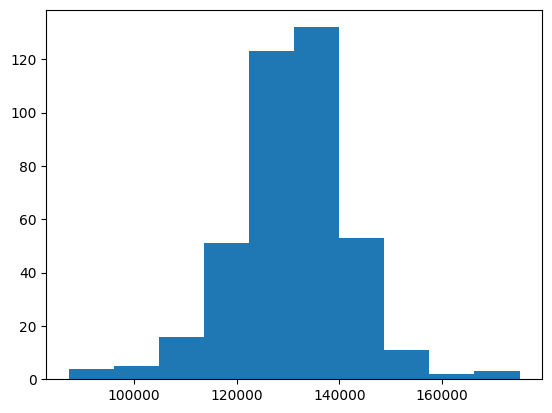

In [38]:
# Each constituency is further divided into zones (i.e., district) but the registered vote is tallied at a constituency-level.
# Therefore, we can drop duplicate constituents and plot the histogram. 
temp = info_c9.drop_duplicates(subset=['cons_id','registered_vote'])
plt.hist(temp["registered_vote"])

# Sanity Check 2: Constituency and province

**Object**: info_c9 and info_province

1. The number of registered votes per province should equal to the sum of registered votes across all constituencies in the province. That is, let $V_{i}$ be the number of votes in province $i$ and $\mathcal{C}_i$ the number of votes per constituency in province $i$. The following must hold: $$V_i = \sum\limits_{c \in C_i} c$$ (True).

2. Basic facts
- The sum of eligible votes should be around 50 million (True).
- 77 provinces and 400 constituencies in the previous election.
- Major provinces in Thailand, such as Bangkok, Nonthaburi, Khon Kaen, Chiang Mai, Nakorn Ratchasima, Surat Thani, etc. should have the largest number of registered votes (True).

3. The number of votes per voting station should contain no outlier (e.g., differ by a factor greater than 2) (True).

In [81]:
# Vote per province = sum of votes across all constituencies within the province
temp1 = info_province.set_index("prov_id")
temp2 = info_c9.drop_duplicates("cons_id").groupby("prov_id").sum()["registered_vote"]
for index in temp.index.tolist():
    assert temp1.loc[index]["total_registered_vote"] == temp2.loc[index]

In [114]:
# Basic facts
assert sum(temp2) > 5*(10**7) ## The total number of registered votes should be around 50 million.
assert len(info_province["prov_id"].unique()) == 77
assert len(info_c9["cons_id"].unique()) == 400

In [116]:
## Most populous provinces and highest number of registered votes.
temp2.sort_values(ascending=False)[:15]

prov_id
BKK    4479155
NMA    2120399
UBN    1473971
KKN    1449595
CMI    1331007
BRM    1250148
UDN    1248824
CBI    1234192
NST    1220778
SSK    1162288
SKA    1098389
SRN    1090337
SPK    1086284
NBI    1056364
RET    1054706
Name: registered_vote, dtype: int64

# Sanity Check 3: Total votes for any candidate and overall turnout

**Object**: result_candi and result_overall

1. The histogram of registered votes per constituency are concentrated around $100,000-160,000$ votes. Assuming a turnout ratio of $75-90\%$ and $5\%$ invalid or no-vote ballot, there should be few constituencies with fewer than $70,000$ or greater than $130,000$ votes (True).

2. The sum of eligible vote

,mp_app_id,mp_app_rank,mp_app_vote,percent,party_id
cons_id,,,,,
LPN_1,LPN_1_3LPN_1_1LPN_1_9LPN_1_7LPN_1_4LPN_1_6LPN_...,78,137569,99.99,8748
LPN_2,LPN_2_2LPN_2_4LPN_2_8LPN_2_1LPN_2_5LPN_2_7LPN_...,91,131375,99.99,9537


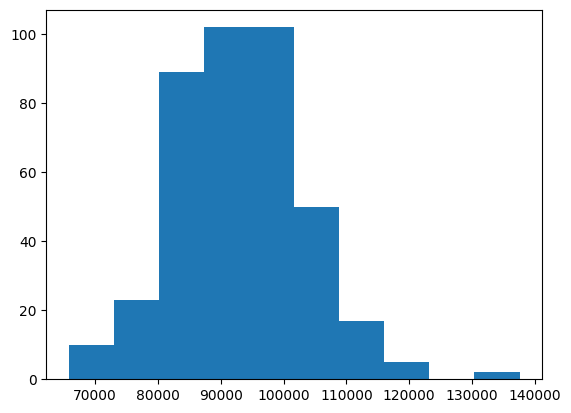

In [129]:
total_vote = result_candi.groupby("cons_id").sum()

plt.hist(total_vote["mp_app_vote"])
total_vote[total_vote["mp_app_vote"] < 70000]
total_vote[total_vote["mp_app_vote"] > 130000]



In [29]:
# The turnout ratio between parties should not vary by too much. 
tempdf = cand_df.groupby("cons_id").sum()

,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
cons_id,,,,,
ACR_1,ACR_1_10ACR_1_8ACR_1_6ACR_1_5ACR_1_9ACR_1_3ACR...,91,100946,95.61636,9518
ACR_2,ACR_2_10ACR_2_1ACR_2_3ACR_2_9ACR_2_5ACR_2_2ACR...,78,106888,95.59534,8821
ATG_1,ATG_1_8ATG_1_7ATG_1_1ATG_1_3ATG_1_5ATG_1_4ATG_...,36,84454,94.09288,5835
ATG_2,ATG_2_8ATG_2_4ATG_2_6ATG_2_1ATG_2_5ATG_2_7ATG_...,45,83268,91.03710,6568
AYA_1,AYA_1_7AYA_1_8AYA_1_5AYA_1_2AYA_1_6AYA_1_1AYA_...,55,102821,93.20504,7335
...,...,...,...,...,...
YLA_2,YLA_2_11YLA_2_5YLA_2_9YLA_2_7YLA_2_4YLA_2_10YL...,120,93349,93.05216,10981
YLA_3,YLA_3_10YLA_3_7YLA_3_11YLA_3_4YLA_3_1YLA_3_9YL...,106,90913,92.81001,10248
YST_1,YST_1_1YST_1_4YST_1_5YST_1_7YST_1_11YST_1_2YST...,91,106293,96.20059,9497


In [55]:
# Because the dataset is created by a lot of volunteers, it is likely that some of the inputs are incorrect. 
# Below are some sanity check this dataset should satisfy. 
"""
1. There must be 400 constituents and 77 provinces.
2. Given that each election district is divided so that it consists of roughly equal
number of eligible voters, the total sum of votes should not vary so much. 


"""

### 1. There must be 400 constituents.
cand_df.groupby("cons_id").nunique().shape[0] == 400

### 2. The sum of voters in each constituent should be around 70-120k.
# In the original dataset from 9geek, MSN_1, MSN_2, NYK_2, PBI_2, PBI_3, PLK_4,
# PTN_1, PTN_3, and SSK_7 have fewer than party list votes. 
# Status: I cross-checked the result with ThaiPBS on districts with too few and too many
# member of parliamentary votes. 
tempdf = cand_df.groupby("cons_id").sum()
tempdf[tempdf["mp_app_vote"] < 70000]

,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
cons_id,,,,,
MSN_1,MSN_1_2MSN_1_7MSN_1_6MSN_1_5MSN_1_3MSN_1_4MSN_...,55,65728,92.40285,7264
MSN_2,MSN_2_5MSN_2_6MSN_2_10MSN_2_4MSN_2_1MSN_2_2MSN...,91,69933,91.06689,9574
NYK_2,NYK_2_5NYK_2_1NYK_2_6NYK_2_3NYK_2_2NYK_2_7NYK_...,55,41716,46.88615,7365
PBI_2,PBI_2_5PBI_2_3PBI_2_6PBI_2_7PBI_2_2PBI_2_1PBI_...,45,48862,43.00211,6577
PBI_3,PBI_3_1PBI_3_2PBI_3_3PBI_3_7PBI_3_5PBI_3_6PBI_...,45,32560,29.56184,6577
PLK_4,PLK_4_5PLK_4_8PLK_4_2PLK_4_4PLK_4_6PLK_4_9PLK_...,78,62060,87.72722,8809
PTN_1,PTN_1_5PTN_1_4PTN_1_6PTN_1_8PTN_1_10PTN_1_7PTN...,120,66286,88.09238,11085
PTN_3,PTN_3_2PTN_3_9PTN_3_7PTN_3_3PTN_3_11PTN_3_5PTN...,92,67707,94.68327,9538
SSK_7,SSK_7_3SSK_7_4SSK_7_6SSK_7_5SSK_7_2SSK_7_10SSK...,55,42728,49.04554,7339


In [51]:
party9_df.groupby("cons_id").sum()

,party_id,party_list_vote,party_list_vote_percent
cons_id,,,
ACR_1,49778,101353,96.00188
ACR_2,49778,106956,95.65614
ATG_1,49778,84919,94.61098
ATG_2,49778,83512,91.30383
AYA_1,49778,104364,94.60373
...,...,...,...
YLA_2,49778,92745,92.45012
YLA_3,49778,91342,93.24802
YST_1,49778,106512,96.39884


In [37]:
cand9_df

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769
